# Parcours Data Scientist - Yann Pham-Van

## Projet 2 : Analysez des données de systèmes éducatifs

## Mission
Vous êtes Data Scientist dans une **start-up de la EdTech**, nommée ***academy***, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

**Mark**, votre manager, vous a convié à une réunion pour vous présenter le projet d’**expansion à l’international** de l’entreprise. Il vous confie une **première mission d’analyse exploratoire**, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?
### Votre mission
Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :
___

Hello,

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

https://datacatalog.worldbank.org/dataset/education-statistics

Ou en téléchargement direct à ce lien.

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :

http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !
___

In [1]:
# Appel des librairies utilisées

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

# Inspection des données

In [2]:
edStatsCountry_Series = pd.read_csv('EdStatsCountry-Series.csv', sep=',')
edStatsCountry = pd.read_csv('EdStatsCountry.csv', sep=',')
edStatsData = pd.read_csv('EdStatsData.csv', sep=',')
edStatsFootNote = pd.read_csv('EdStatsFootNote.csv', sep=',')
edStatsSeries = pd.read_csv('EdStatsSeries.csv', sep=',')

J'affiche les premières lignes des dataframes pour vérifier que les données sont bien chargées, puis leur structure et enfin le type des colonnes, la présence de doublons ou le taux de données manquantes.

In [3]:
edStatsCountry_Series.head(1)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [4]:
edStatsCountry_Series.shape

(613, 4)

In [5]:
edStatsCountry_Series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [6]:
edStatsCountry_Series.duplicated().sum()

0

In [7]:
edStatsCountry_Series.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

In [8]:
edStatsCountry.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


In [9]:
edStatsCountry.shape

(241, 32)

In [10]:
edStatsCountry.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [11]:
edStatsCountry.duplicated().sum()

0

In [12]:
edStatsCountry.isna().mean().sort_values()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
WB-2 code                                            0.004149
2-alpha code                                         0.012448
System of National Accounts                          0.107884
Currency Unit                                        0.107884
Region                                               0.112033
Income Group                                         0.112033
Latest population census                             0.116183
National accounts base year                          0.149378
System of trade                                      0.170124
SNA price valuation                                  0.182573
Latest trade data                                    0.232365
IMF data dissemination standard                      0.248963
Balance 

In [13]:
edStatsData.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
edStatsData.shape

(886930, 70)

In [15]:
edStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [16]:
edStatsData.duplicated().sum()

0

In [17]:
edStatsData.isna().mean().sort_values()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
                    ...   
1973              0.959924
1971              0.959933
2016              0.981442
2017              0.999839
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [18]:
edStatsFootNote.head(1)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN


In [19]:
edStatsFootNote.shape

(643638, 5)

In [20]:
edStatsFootNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [21]:
edStatsFootNote.duplicated().sum()

0

In [22]:
edStatsFootNote.isna().mean()

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [23]:
edStatsSeries.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
edStatsSeries.shape

(3665, 21)

In [25]:
edStatsSeries.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [26]:
edStatsSeries.duplicated().sum()

0

In [27]:
edStatsSeries.isna().mean()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

A l'observation préliminaire de ces dataframes, il semblerait que le coeur des données se trouve dans celui-ci : **edStatsData**

C'est sur lui que je vais commencer à me concentrer.

**edStatsData** est constitué de lignes qui sont des couples pays/indicateur et en colonne la valeur de l'indicateur pour chaque année.
___
Observation des colonnes.

In [28]:
edStatsData.columns.tolist()

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100',
 'Unnamed: 69']

En particulier, l'étude ne justifie pas de conserver les valeurs des années avant 2010 et après 2020.

In [29]:
colonnes_autorisees = ['Country Code', 'Country Name', 'Indicator Code', '2010', '2011', '2012', '2013', 
                       '2014', '2015', '2016', '2017', '2020']  
edStatsData = edStatsData[colonnes_autorisees]
edStatsData.head(1)

,Country Code,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,ARB,Arab World,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je recherche des variables pertinentes (Indicator Code) à l'aide de la liste des indicateurs mis à disposition par la Banque Mondiale : https://datatopics.worldbank.org/education/indicators
___
Mon objectif est de pouvoir quantifier le potentiel - et sa croissance - d'habitants suffisamment aisés, cibles d'*academy*, susceptibles d'être :
- équipé d'un accès internet et
- dans le deuxième cycle du secondaire ou
- étudiants dans le supérieur.
___
**Développement d'internet**

IT.NET.USER.P2 : *Internautes (pour 100 personnes)*
___
**Richesse**

NY.GDP.PCAP.PP.KD : *PIB par habitant, PPA (dollars internationaux constants de 2011)*
___
**Quantification de la population cible = publics de niveau lycée (deuxième cycle du secondaire) et université**

SP.SEC.UTOT.IN : *Population d'âge scolaire, deuxième cycle de l'enseignement secondaire, les deux sexes (nombre)*

SP.TER.TOTL.IN : *Population d'âge scolaire, enseignement supérieur, les deux sexes (nombre)*

SP.POP.TOTL : *Population*

SP.POP.1524.TO.UN : *Population, 15-24 ans, total*

SP.POP.GROW : *Croissance démographique (% annuel)*

SE.TER.ENRR : *Taux brut de scolarisation dans l'enseignement supérieur, les deux sexes (%)*

SE.TER.ENRL : *Inscriptions dans l'enseignement supérieur, tous programmes confondus, hommes et femmes (nombre)*

SE.TER.PRIV.ZS : *Pourcentage d'inscriptions dans l'enseignement supérieur dans des établissements privés (%)*

UIS.PRP.3 : *Pourcentage d'inscriptions dans l'enseignement secondaire supérieur dans des établissements privés (%)*

UIS.OFST.3.CP : *Jeunes non scolarisés en âge de fréquenter le deuxième cycle du secondaire, les deux sexes (nombre)*

UIS.ROFST.3.CP : *Taux de non-scolarisation des jeunes en âge de fréquenter le deuxième cycle du secondaire, les deux sexes (%)*

SE.SEC.ENRR.UP : *Taux brut de scolarisation, deuxième cycle du secondaire, les deux sexes (%)*

UIS.E.3 : *Inscriptions dans l'enseignement secondaire supérieur, les deux sexes (nombre)*
___

**Certains indicateurs sont similaires ou leurs combinaisons permettrait d'aboutir aux mêmes résultats pour quantifier la cible. Le choix final dépendra aussi des taux de remplissage.**
___
En attendant, je restreins déjà le dataframe à ces indicateurs.

In [30]:
liste_indicateurs = ['IT.NET.USER.P2', 'NY.GDP.PCAP.PP.KD', 'SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN', 'SP.POP.TOTL', 
                     'SP.POP.1524.TO.UN', 'SP.POP.GROW', 'SE.TER.PRIV.ZS', 'SE.TER.ENRR', 'SE.TER.ENRL', 
                     'UIS.PRP.3', 'UIS.OFST.3.CP', 'UIS.ROFST.3.CP', 
                     'SE.SEC.ENRR.UP', 'UIS.E.3']

In [31]:
edStatsData = edStatsData.loc[edStatsData['Indicator Code'].isin(liste_indicateurs)]
edStatsData.head()

,Country Code,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2020
1204,ARB,Arab World,SE.TER.ENRL,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,NaN,NaN,NaN
1214,ARB,Arab World,UIS.E.3,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN,NaN,NaN,NaN
1246,ARB,Arab World,NY.GDP.PCAP.PP.KD,1.475905e+04,1.482591e+04,1.534280e+04,1.545497e+04,NaN,NaN,NaN,NaN,NaN
1339,ARB,Arab World,SE.TER.ENRR,2.476180e+01,2.427387e+01,2.577601e+01,2.733034e+01,2.817496e+01,NaN,NaN,NaN,NaN
1343,ARB,Arab World,SE.SEC.ENRR.UP,4.938588e+01,5.392444e+01,5.575670e+01,5.567087e+01,5.559698e+01,NaN,NaN,NaN,NaN


J'observe les valeurs manquantes.

In [32]:
edStatsData.isna().mean()

Country Code      0.000000
Country Name      0.000000
Indicator Code    0.000000
2010              0.260606
2011              0.257300
2012              0.267493
2013              0.277961
2014              0.300000
2015              0.483471
2016              0.701377
2017              1.000000
2020              1.000000
dtype: float64

Les 2 dernières années, 2017 et 2020, sont vides : autant les supprimer.

In [33]:
edStatsData = edStatsData.drop(columns=['2017', '2020'])
edStatsData.head(1)

,Country Code,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
1204,ARB,Arab World,SE.TER.ENRL,8715273.0,8594488.0,9147083.0,9688632.0,9966484.0,NaN,NaN


Je m'intéresse maintenant aux niveaux de remplissage des indicateurs.

In [34]:
edStatsData['NB_NAN'] = (edStatsData.isna().sum(axis=1)) / 7
# /!\ Je divise par 7 la somme horizontale des Nan, car c'est le potentiel maximum de NaN par ligne.
# En effet, les 3 premières colonnes seront toujours remplies.
# Seules les colonnes 'années' peuvent être vides.
# La division permettra ensuite de quantifier le taux de NaN en pourcentage.
edStatsData.head(1)

,Country Code,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,NB_NAN
1204,ARB,Arab World,SE.TER.ENRL,8715273.0,8594488.0,9147083.0,9688632.0,9966484.0,NaN,NaN,0.285714


Je recherche le taux de remplissage par indicateur.

In [35]:
edStatsData.groupby('Indicator Code')['NB_NAN'].mean().sort_values()

Indicator Code
SP.POP.TOTL          0.023613
SP.POP.GROW          0.024203
IT.NET.USER.P2       0.068477
NY.GDP.PCAP.PP.KD    0.129870
SP.SEC.UTOT.IN       0.135773
SP.TER.TOTL.IN       0.314640
SP.POP.1524.TO.UN    0.358914
SE.SEC.ENRR.UP       0.429162
SE.TER.ENRL          0.453365
SE.TER.ENRR          0.475207
UIS.E.3              0.501181
SE.TER.PRIV.ZS       0.612161
UIS.PRP.3            0.619835
UIS.OFST.3.CP        0.657025
UIS.ROFST.3.CP       0.657025
Name: NB_NAN, dtype: float64

En observant les indicateurs les mieux renseignés, je m'aperçois qu'il faut aller jusqu'aux 6 premiers pour avoir toutes les variables nécessaires de richesse, potentiel de cibles, taux de croissance des populations.

Je peux donc restreindre encore la liste des indicateurs.

In [36]:
liste_indicateurs = ['IT.NET.USER.P2', 'NY.GDP.PCAP.PP.KD', 'SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN', 'SP.POP.TOTL', 'SP.POP.GROW']
edStatsData = edStatsData.loc[edStatsData['Indicator Code'].isin(liste_indicateurs)]
edStatsData.head()

,Country Code,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,NB_NAN
1246,ARB,Arab World,NY.GDP.PCAP.PP.KD,1.475905e+04,1.482591e+04,1.534280e+04,1.545497e+04,NaN,NaN,NaN,0.428571
1375,ARB,Arab World,IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,0.428571
2307,ARB,Arab World,SP.POP.GROW,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN,NaN,0.428571
2326,ARB,Arab World,SP.TER.TOTL.IN,3.519644e+07,3.540634e+07,3.548681e+07,3.545010e+07,35373556.0,NaN,NaN,0.285714
2332,ARB,Arab World,SP.SEC.UTOT.IN,2.155430e+07,2.154900e+07,2.157159e+07,2.159408e+07,21576684.0,NaN,NaN,0.285714


Pour améliorer le taux de remplissage, en définissant la colonne *2016* comme année de référence pour les calculs futurs, je remplace les valeurs *NaN* par la dernière valeur non nulle, en restreignant la remontée d'informations à 3 années antérieures, pour éviter un déséquilibre de comparaison entre les pays avec des valeurs récentes ou plus anciennes.
Je préfère supprimer un pays aux informations trop obsolètes.

In [37]:
edStatsData = edStatsData.fillna(method='ffill', axis=1, limit=3)
edStatsData.head(1)

,Country Code,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,NB_NAN
1246,ARB,Arab World,NY.GDP.PCAP.PP.KD,14759.050926,14825.90958,15342.795448,15454.968241,15454.968241,15454.968241,15454.968241,0.428571


Je supprime les colonnes inutiles et renomme celles qui restent.

In [38]:
edStatsData = edStatsData.drop(columns=['2010', '2011', '2012', '2013', '2014', '2015'])
edStatsData = edStatsData.rename(columns={'Country Code': 'Code_Pays', 'Country Name': 'Pays', 'Indicator Code': 'Indicateur', '2016': 'Valeur'})
edStatsData.head(1)

,Code_Pays,Pays,Indicateur,Valeur,NB_NAN
1246,ARB,Arab World,NY.GDP.PCAP.PP.KD,15454.968241,0.428571


Je calcule les taux de remplissage par pays.

In [39]:
edStatsData['NB_NAN'] = edStatsData.isna().sum(axis=1)
edStatsData.head(1)

,Code_Pays,Pays,Indicateur,Valeur,NB_NAN
1246,ARB,Arab World,NY.GDP.PCAP.PP.KD,15454.968241,0


In [40]:
edStatsData.groupby('Pays')['NB_NAN'].mean().sort_values()

Pays
Afghanistan                                           0.000000
Middle East & North Africa                            0.000000
Middle East & North Africa (excluding high income)    0.000000
Middle income                                         0.000000
Moldova                                               0.000000
                                                        ...   
Channel Islands                                       0.666667
Turks and Caicos Islands                              0.666667
Northern Mariana Islands                              0.666667
Nauru                                                 0.666667
St. Martin (French part)                              0.666667
Name: NB_NAN, Length: 242, dtype: float64

Les taux de remplissage sont encore loin d'être acceptables.
___
Je transforme le dataframe avec une agrégation des données de sorte que les indicateurs apparaissent en colonne pour chaque pays/continent en ligne.

In [41]:
edStatsData = edStatsData.pivot_table(index=['Code_Pays', 'Pays'], columns='Indicateur', values='Valeur')
edStatsData = edStatsData.reset_index()
edStatsData.head(1)

Indicateur,Code_Pays,Pays,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.SEC.UTOT.IN,SP.TER.TOTL.IN
0,ABW,Aruba,93.542454,NaN,0.459929,104822.0,4465.0,7634.0



Je constate aussi que dans cette liste de 242 "*Pays*", certains se rapportent à une agrégation (*Middle East & North Africa* ou *Arab World*) plutôt qu'à un pays unique en tant que tel.

Je vérifie de plus près.

In [42]:
edStatsData['Pays'].unique().tolist()

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia',
 'Ecuador',
 'E

Effectivement, tout le début de la liste est relatif à des agrégations de zones géographiques et/ou des filtres sur le niveau des revenus.
Le besoin pour *Mark* vaut, d'une part, pour les **pays pris individuellement** et, d'autre part, pour des **continents**.

Le travail à suivre sera à mener en parallèle sur 2 extractions du dataframe.
___
Je cherche s'il y a un moyen simple d'y parvenir.

Peut-être à l'aide du dataframe *edStatsCountry*.

Mais pour commencer, ce dernier contient 241 pays, contre 242 dans *edStatsData*.

J'établis la liste des pays de *edStatsCountry*.

In [43]:
liste_country = edStatsCountry['Country Code'].unique().tolist()

Je cherche le pays supplémentaire dans *edStatsData*.

In [44]:
print(edStatsData.loc[~edStatsData['Code_Pays'].isin(liste_country)]['Code_Pays'].unique().tolist())
print(edStatsData.loc[~edStatsData['Code_Pays'].isin(liste_country)]['Pays'].unique().tolist())

['VGB']
['British Virgin Islands']


Il s'agit d'un vrai pays que je devrai ajouter à ma liste finale.
___
Pour revenir à mon besoin de différencier facilement les pays uniques des agrégations dans *edStatsCountry*, la colonne *Currency Unit* est peut-être un critère.

In [45]:
edStatsCountry.loc[edStatsCountry['Currency Unit'].isna()]['Table Name'].unique().tolist()

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (all income levels)',
 'Europe & Central Asia',
 'Europe & Central Asia (all income levels)',
 'Euro area',
 'European Union',
 'High income',
 'Heavily indebted poor countries (HIPC)',
 'Latin America & Caribbean',
 'Latin America & Caribbean (all income levels)',
 'Least developed countries: UN classification',
 'Low income',
 'Lower middle income',
 'Low & middle income',
 'Middle East & North Africa (all income levels)',
 'Middle income',
 'Middle East & North Africa',
 'North America',
 'Nauru',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (all income levels)',
 'Upper middle income',
 'World']

C'est intéressant mais 1 vrai pays apparaît quand même : *Nauru* dont le *Code_Pays* est :

In [46]:
edStatsCountry.loc[edStatsCountry['Table Name'] == 'Nauru']['Country Code']

166    NRU
Name: Country Code, dtype: object

J'observe la liste complémentaire des pays avec une monnaie non vide pour vérifier si une agrégation pourrait se glisser dans la liste des pays uniques.

In [47]:
edStatsCountry.loc[~edStatsCountry['Currency Unit'].isna()]['Table Name'].unique().tolist()

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'Faeroe Islands',
 'Micronesia, Fed. Sts.',
 'Gabon',
 'United Ki

A priori, cette liste paraît composée exclusivement de pays uniques.
___
Je peux créer la liste des pays uniques, à partir du **code pays** qui est la correspondance la plus sûre entre les 2 dataframes puis y ajouter les 2 pays repérés ci-dessus :

In [48]:
pays = edStatsCountry.loc[~edStatsCountry['Currency Unit'].isna()]['Country Code'].unique().tolist()
pays = pays + ['VGB', 'NRU']

Pour créer la liste des continents, il n'y a pas moyen de distinguer particulièrement parmi les agrégations.

Le plus simple est de la créer manuellement, à partir de leur nom.

In [49]:
continent = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 
           'North America', 'South Asia', 'Sub-Saharan Africa']

Je crée une nouvelle colonne *Type* indiquant la typologie exacte du pays : *Pays* ou *Continent*.

In [50]:
edStatsData.loc[edStatsData['Code_Pays'].isin(pays), 'Type'] = 'Pays'
edStatsData.loc[edStatsData['Pays'].isin(continent), 'Type'] = 'Continent'   
edStatsData.head(1)

Indicateur,Code_Pays,Pays,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.SEC.UTOT.IN,SP.TER.TOTL.IN,Type
0,ABW,Aruba,93.542454,NaN,0.459929,104822.0,4465.0,7634.0,Pays


Je supprime toutes autres lignes, correspondant aux agrégations qui ne m'intéressent pas.

In [51]:
edStatsData = edStatsData.loc[~edStatsData['Type'].isna()]

Je renomme les indicateurs.

In [52]:
edStatsData = edStatsData.rename(columns={'IT.NET.USER.P2': "Taux d'internautes", 'NY.GDP.PCAP.PP.KD': 'PIB/habitant', 
                        'SP.POP.GROW': 'Croissance démographique', 'SP.POP.TOTL': 'Population', 
                        'SP.SEC.UTOT.IN': 'Secondaire', 
                        'SP.TER.TOTL.IN': 'Supérieur'})

J'observe les taux de remplissage.

In [53]:
edStatsData.isna().mean().sort_values()

Indicateur
Code_Pays                   0.000000
Pays                        0.000000
Type                        0.000000
Croissance démographique    0.013393
Population                  0.013393
Taux d'internautes          0.066964
Secondaire                  0.089286
Supérieur                   0.098214
PIB/habitant                0.129464
dtype: float64

J'ai besoin de faire le point sur les **outliers**.

In [54]:
edStatsData.describe()

Indicateur,Taux d'internautes,PIB/habitant,Croissance démographique,Population,Secondaire,Supérieur
count,209.000000,195.000000,221.000000,2.210000e+02,2.040000e+02,2.020000e+02
mean,51.497758,18719.555811,1.304550,6.721639e+07,3.726306e+06,5.923788e+06
std,28.299782,20059.126188,1.136027,2.538911e+08,1.440484e+07,2.160544e+07
min,1.177119,647.880445,-1.797539,1.109700e+04,4.160000e+02,8.680000e+02
25%,25.506579,3804.310859,0.499962,9.423330e+05,7.671250e+04,1.510522e+05
50%,54.000000,12071.592377,1.163574,7.057412e+06,3.524605e+05,6.123205e+05
75%,76.176737,25859.932501,2.111220,2.820673e+07,1.520442e+06,2.602514e+06
max,98.240016,118207.134623,5.217721,2.296786e+09,1.333664e+08,1.765053e+08


Le max de *Population* n'est pas surprenant puisque les continents sont présents.

A l'opposé, je veux supprimer les pays à faible population avec moins de 1M d'habitants et les 25% les moins aisés en terme de PIB/habitant.

Je veille à conserver tous les continents.

In [55]:
edStatsData = edStatsData.loc[((edStatsData['Population'] > 1_000_000) & (edStatsData['PIB/habitant'] > 3804)) | 
                              (edStatsData['Type'] == 'Continent')]

In [56]:
edStatsData.describe()

Indicateur,Taux d'internautes,PIB/habitant,Croissance démographique,Population,Secondaire,Supérieur
count,119.000000,120.000000,120.000000,1.200000e+02,1.170000e+02,1.150000e+02
mean,60.557003,23596.161149,1.093352,1.150519e+08,5.913647e+06,9.578087e+06
std,23.339150,18909.943457,1.120073,3.371971e+08,1.869757e+07,2.807444e+07
min,8.121949,3453.431260,-1.797539,1.170125e+06,3.003600e+04,6.183900e+04
25%,45.980870,9721.948262,0.320491,4.752996e+06,1.812630e+05,3.481265e+05
50%,62.302193,16809.231882,1.117082,1.060521e+07,4.868010e+05,9.322650e+05
75%,78.577847,32850.436836,1.695287,4.930149e+07,2.244431e+06,3.792352e+06
max,97.999981,118207.134623,5.217721,2.296786e+09,1.333664e+08,1.765053e+08


Je vérifie le taux de remplissage.

In [57]:
edStatsData.isna().mean().sort_values()

Indicateur
Code_Pays                   0.000000
Pays                        0.000000
PIB/habitant                0.000000
Croissance démographique    0.000000
Population                  0.000000
Type                        0.000000
Taux d'internautes          0.008333
Secondaire                  0.025000
Supérieur                   0.041667
dtype: float64

A environ 4% au pire, il est assez satisfaisant.

Je regarde de plus près les pays concernés.

In [58]:
edStatsData.loc[(edStatsData["Taux d'internautes"].isna()) | (edStatsData['Secondaire'].isna()) | 
                (edStatsData['Supérieur'].isna())]

Indicateur,Code_Pays,Pays,Taux d'internautes,PIB/habitant,Croissance démographique,Population,Secondaire,Supérieur,Type
6,ARE,United Arab Emirates,90.600007,67133.065519,1.251759,9269612.0,244592.0,NaN,Pays
22,BIH,Bosnia and Herzegovina,69.331006,11327.412182,-0.542908,3516816.0,NaN,NaN,Pays
169,OMN,Oman,69.815213,40138.951725,5.217721,4424762.0,142845.0,NaN,Pays
191,SGP,Singapore,81.000000,81443.356456,1.297436,5607283.0,NaN,NaN,Pays
237,XKX,Kosovo,NaN,9331.687718,0.796024,1816200.0,NaN,NaN,Pays


Le Kosovo est à seulement 50% de remplissage, appartient aux quartiles les plus faibles en termes de PIB/habitant et d'habitants.

Je peux le supprimer de la liste.

In [59]:
edStatsData = edStatsData[edStatsData['Pays'] != 'Kosovo']

Pour les 4 autres pays restants, il manque la cible pour le deuxième cycle du secondaire et/ou la cible du supérieur.

Il serait intéressant de vérifier s'il n'existe pas une corrélation entre la **Population** d'un pays et les échantillons correspondants à la cible *secondaire*, à la cible *supérieur*, voire à la somme des 2 qui est notre **cible globale**.
___
Je calcule d'abord cette somme qui s'appellera **Cible**.

In [60]:
edStatsData['Cible'] = edStatsData['Secondaire'] + edStatsData['Supérieur']
edStatsData.head(1)

Indicateur,Code_Pays,Pays,Taux d'internautes,PIB/habitant,Croissance démographique,Population,Secondaire,Supérieur,Type,Cible
2,AGO,Angola,13.0,5984.640422,3.367572,28813463.0,1736603.0,2374694.0,Pays,4111297.0


J'observe visuellement la distribution des cibles par rappport à la *population*, en faisant attention à écarter les continents, avec un dataframe *mask*.

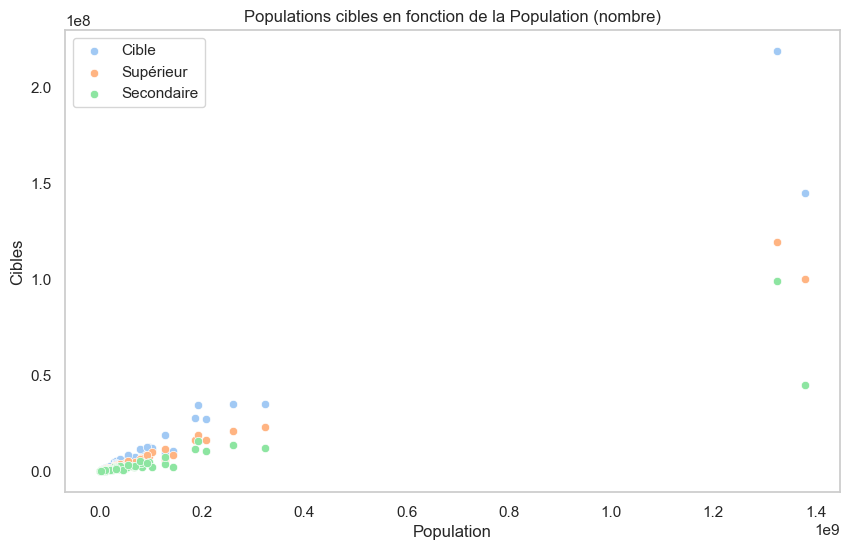

In [61]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.set_theme(style='whitegrid', palette='pastel')
df_pays = edStatsData.loc[edStatsData['Type'] == 'Pays']
cibles = ['Cible', 'Supérieur', 'Secondaire']
for c in cibles:
    sns.scatterplot(data=df_pays, x='Population', y=c, label=c)

plt.ylabel("Cibles")
plt.title("Populations cibles en fonction de la Population (nombre)")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Je zoome en sortant du cadre les 2 plus gros pays, qui sont probablement la Chine et l'Inde.

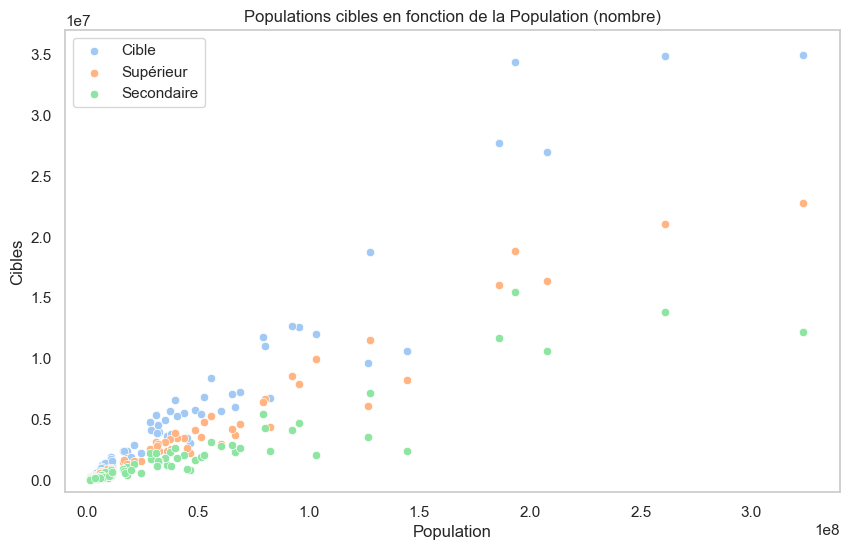

In [62]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.set_theme(style='whitegrid', palette='pastel')

cibles = ['Cible', 'Supérieur', 'Secondaire']
for c in cibles:
    sns.scatterplot(data=df_pays, x='Population', y=c, label=c)

plt.ylabel("Cibles")
plt.xlim(-10_000_000, 340_000_000)
plt.ylim(-1_000_000, 37_000_000)
plt.title("Populations cibles en fonction de la Population (nombre)")
plt.legend(loc='upper left')
plt.grid()
plt.show()

A première vue, une relation existerait entre la taille de la *Population* et celles des cibles.

Pour confirmer, je calcule le **coefficient de régression de Pearson** en retirant provisoirement les pays incriminés, qui contiennent des NaN.

In [63]:
pays_hors_calcul = ['United Arab Emirates', 'Bosnia and Herzegovina', 'Oman', 'Singapore']
df_clean = df_pays[~df_pays['Pays'].isin(pays_hors_calcul)]

In [64]:
r_pop_sec = st.pearsonr(df_clean["Population"],df_clean["Secondaire"])[0]
print('Le coefficient de corrélation entre les variables *Population* et *Secondaire* est :', r_pop_sec)
r_pop_sup = st.pearsonr(df_clean["Population"],df_clean["Supérieur"])[0]
print('Le coefficient de corrélation entre les variables *Population* et *Supérieur* est :', r_pop_sup)
r_pop_cible = st.pearsonr(df_clean["Population"],df_clean["Cible"])[0]
print('Le coefficient de corrélation entre les variables *Population* et *Cible* est :', r_pop_cible)

Le coefficient de corrélation entre les variables *Population* et *Secondaire* est : 0.9251485887185674
Le coefficient de corrélation entre les variables *Population* et *Supérieur* est : 0.9925684629778421
Le coefficient de corrélation entre les variables *Population* et *Cible* est : 0.9738101522812724


Les coefficients sont largement acceptables, proches de 1.

La meilleure corrélation est obtenue via la cible *Supérieur*.

Je chercherai donc cette valeur seule pour *United Arab Emirates* et *Oman* puisque la cible *Secondaire* est déjà renseignée.

Ensuite, c'est directement la somme des 2 cibles - *Cible* - qui sera recherchée pour les 2 autres pays.
___
Je détermine la droite de régression entre *Population* et *Supérieur*.

In [65]:
Y = df_clean['Supérieur']
X = df_clean[['Population']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['Population'],result.params['intercept']

J'en déduis la valeur de *Supérieur* pour *United Arab Emirates* et *Oman* puis la somme avec la *Secondaire* pour obtenir la *Cible*.

In [66]:
edStatsData.loc[edStatsData['Pays'] == 'United Arab Emirates', 'Supérieur'] = round(a * (edStatsData.loc[edStatsData['Pays'] == 'United Arab Emirates', 
                                                                                    'Population']) + b,0)
edStatsData.loc[edStatsData['Pays'] == 'Oman', 'Supérieur'] = round(a * (edStatsData.loc[edStatsData['Pays'] == 'Oman', 
                                                                                    'Population']) + b,0)
edStatsData['Cible'] = edStatsData['Secondaire'] + edStatsData['Supérieur']

In [67]:
edStatsData.loc[edStatsData['Pays'].isin(pays_hors_calcul)]

Indicateur,Code_Pays,Pays,Taux d'internautes,PIB/habitant,Croissance démographique,Population,Secondaire,Supérieur,Type,Cible
6,ARE,United Arab Emirates,90.600007,67133.065519,1.251759,9269612.0,244592.0,628745.0,Pays,873337.0
22,BIH,Bosnia and Herzegovina,69.331006,11327.412182,-0.542908,3516816.0,NaN,NaN,Pays,NaN
169,OMN,Oman,69.815213,40138.951725,5.217721,4424762.0,142845.0,237352.0,Pays,380197.0
191,SGP,Singapore,81.000000,81443.356456,1.297436,5607283.0,NaN,NaN,Pays,NaN


Je cherche maintenant la droite de régression entre *Population* et *Cible*.

In [68]:
Y = df_clean['Cible']
X = df_clean[['Population']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['Population'],result.params['intercept']

D'où les valeurs de *Cible* pour les 2 derniers pays manquants.

In [69]:
edStatsData.loc[edStatsData['Pays'] == 'Bosnia and Herzegovina', 'Cible'] = round(a * (edStatsData.loc[edStatsData['Pays'] == 'Bosnia and Herzegovina', 
                                                                               'Population']) + b,0)
edStatsData.loc[edStatsData['Pays'] == 'Singapore', 'Cible'] = round(a * (edStatsData.loc[edStatsData['Pays'] == 'Singapore', 
                                                                               'Population']) + b,0)

In [70]:
edStatsData.loc[edStatsData['Pays'].isin(pays_hors_calcul)]

Indicateur,Code_Pays,Pays,Taux d'internautes,PIB/habitant,Croissance démographique,Population,Secondaire,Supérieur,Type,Cible
6,ARE,United Arab Emirates,90.600007,67133.065519,1.251759,9269612.0,244592.0,628745.0,Pays,873337.0
22,BIH,Bosnia and Herzegovina,69.331006,11327.412182,-0.542908,3516816.0,NaN,NaN,Pays,131208.0
169,OMN,Oman,69.815213,40138.951725,5.217721,4424762.0,142845.0,237352.0,Pays,380197.0
191,SGP,Singapore,81.000000,81443.356456,1.297436,5607283.0,NaN,NaN,Pays,410253.0


Je peux tracer la droite de régression linéaire entre la *Population* et la *cible* complète.

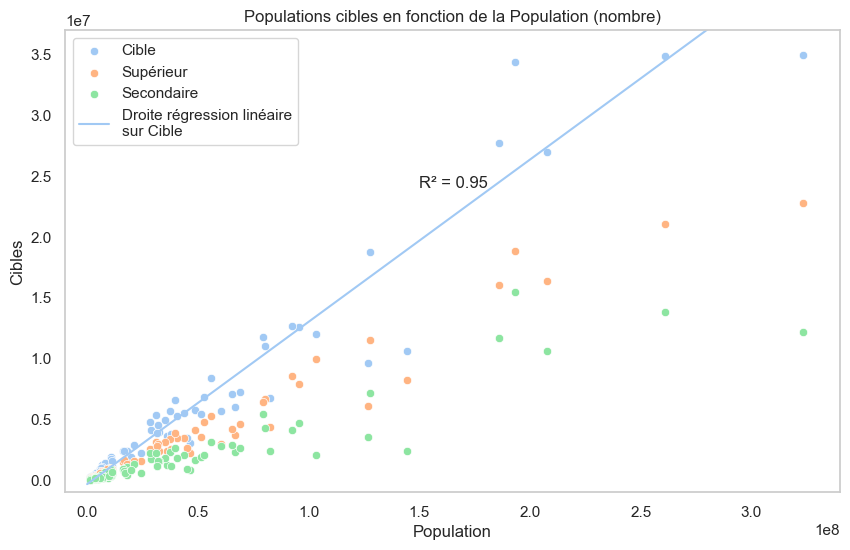

In [71]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.set_theme(style='whitegrid', palette='pastel')

cibles = ['Cible', 'Supérieur', 'Secondaire']
for c in cibles:
    sns.scatterplot(data=edStatsData, x='Population', y=c, label=c)
plt.plot(np.arange(0, 350_000_001, 175_000_000),[a*x+b for x in np.arange(0, 350_000_001, 175_000_000)], label="Droite régression linéaire\nsur Cible")
plt.ylabel("Cibles")
plt.xlim(-10_000_000, 340_000_000)
plt.ylim(-1_000_000, 37_000_000)
plt.title("Populations cibles en fonction de la Population (nombre)")
plt.legend(loc='upper left')
# Calcul du coefficient de détermination
r2 = round(r_pop_cible**2, 2)
plt.text(1.5e8, 2.4e7, 'R² = '+str(r2))
plt.grid()
plt.show()

Je vérifie le taux de remplissage.

In [72]:
edStatsData.isna().mean().sort_values()

Indicateur
Code_Pays                   0.000000
Pays                        0.000000
Taux d'internautes          0.000000
PIB/habitant                0.000000
Croissance démographique    0.000000
Population                  0.000000
Type                        0.000000
Cible                       0.000000
Secondaire                  0.016807
Supérieur                   0.016807
dtype: float64

Toutes les variables qui m'intéressent sont complètes.
___
Je peux supprimer les colonnes *Population*, *Secondaire* et *Supérieur* devenues désormais inutiles puisque je possède la population cible totale des habitants susceptibles d'être dans le deuxième cycle du secondaire ou dans le supérieur, soit la **cible** d'*Academy*.

In [73]:
edStatsData = edStatsData.drop(columns=['Population', 'Secondaire', 'Supérieur'])
edStatsData.head(1)

Indicateur,Code_Pays,Pays,Taux d'internautes,PIB/habitant,Croissance démographique,Type,Cible
2,AGO,Angola,13.0,5984.640422,3.367572,Pays,4111297.0


--------------------
Statistiques de répartition des Pays selon Taux d'internautes
Moyenne : 61.17 
Médiane : 66.02 
Ecart-type : 23.28
--------------------
Statistiques de répartition des Continent selon Taux d'internautes
Moyenne : 50.67 
Médiane : 52.8 
Ecart-type : 20.13


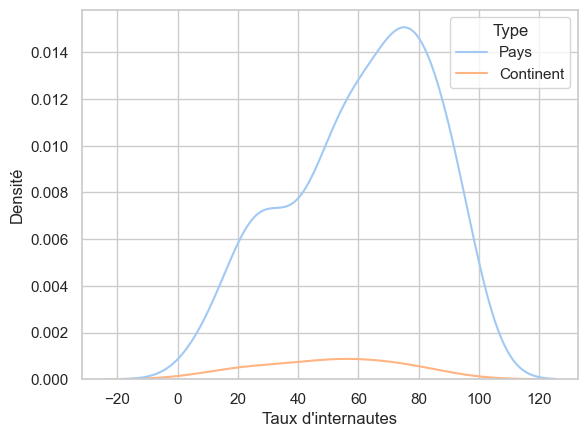

--------------------
Statistiques de répartition des Pays selon PIB/habitant
Moyenne : 23959.71 
Médiane : 17313.44 
Ecart-type : 19033.05
--------------------
Statistiques de répartition des Continent selon PIB/habitant
Moyenne : 19817.22 
Médiane : 15786.8 
Ecart-type : 15407.41


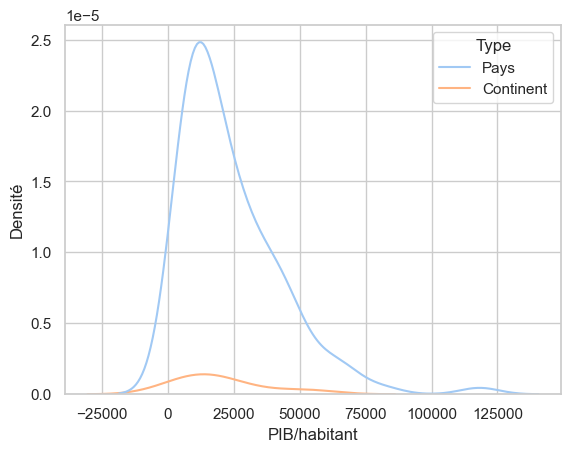

--------------------
Statistiques de répartition des Pays selon Croissance démographique
Moyenne : 1.09 
Médiane : 1.13 
Ecart-type : 1.14
--------------------
Statistiques de répartition des Continent selon Croissance démographique
Moyenne : 1.26 
Médiane : 1.05 
Ecart-type : 0.73


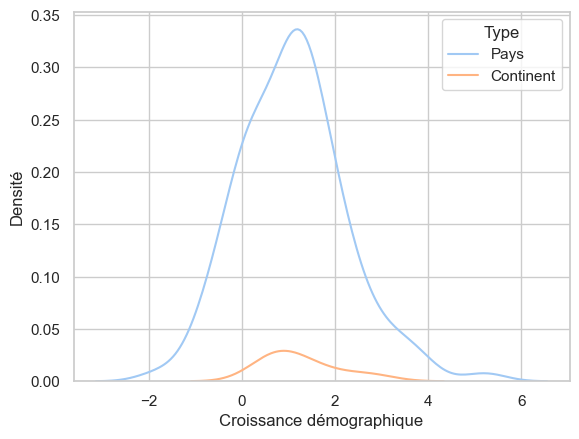

--------------------
Statistiques de répartition des Pays selon Cible
Moyenne : 7245411.43 
Médiane : 1074434.5 
Ecart-type : 25035058.68
--------------------
Statistiques de répartition des Continent selon Cible
Moyenne : 140471177.43 
Médiane : 90736428.0 
Ecart-type : 93171811.29


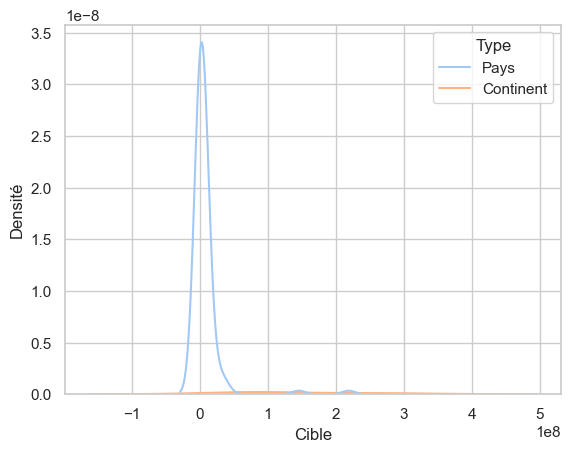

In [74]:
indicateurs = ["Taux d'internautes", 'PIB/habitant', 'Croissance démographique', 'Cible']
type = ['Pays', 'Continent']
plt.rcParams.update({'font.size': 14})
sns.set_theme(style='whitegrid', palette='pastel')
for i in indicateurs:  
    for t in type:
        print("-"*20)
        print("Statistiques de répartition des", t, "selon",i)
        print("Moyenne :", round(edStatsData.loc[edStatsData['Type'] == t, i].mean(),2),"\nMédiane :", 
              round(edStatsData.loc[edStatsData['Type'] == t, i].median(),2),"\nEcart-type :", 
              round(edStatsData.loc[edStatsData['Type'] == t, i].std(ddof=0),2))
    sns.kdeplot(data=edStatsData, x=i, hue='Type')
    plt.ylabel("Densité")
    plt.show()
# Je garde pour les statistiques.
# Les graphes eux-mêmes ne sont pas très intéressants,
# surtout le regroupement des pays et continents lesquels se retrouvent très "écrasés".
# Le choix des graphes n'est pas pertinent avec un démarrage de courbe en valeurs négatives ce qui peut être perturbant !

# Analyse des données

Création des scores en prenant garde à différencier les pays des continents.

In [75]:
edStatsData.loc[edStatsData['Type'] == 'Pays', 'SCORE_INTERNET'] = edStatsData["Taux d'internautes"] / edStatsData.loc[edStatsData['Type'] == 'Pays']["Taux d'internautes"].max()
edStatsData.loc[edStatsData['Type'] == 'Pays', 'SCORE_PIB'] = edStatsData['PIB/habitant'] / edStatsData.loc[edStatsData['Type'] == 'Pays']['PIB/habitant'].max()
edStatsData.loc[edStatsData['Type'] == 'Pays', 'SCORE_POP'] = edStatsData['Cible'] / edStatsData.loc[edStatsData['Type'] == 'Pays']['Cible'].max()
edStatsData.loc[edStatsData['Type'] == 'Continent', 'SCORE_INTERNET'] = edStatsData["Taux d'internautes"] / edStatsData.loc[edStatsData['Type'] == 'Continent']["Taux d'internautes"].max()
edStatsData.loc[edStatsData['Type'] == 'Continent', 'SCORE_PIB'] = edStatsData['PIB/habitant'] / edStatsData.loc[edStatsData['Type'] == 'Continent']['PIB/habitant'].max()
edStatsData.loc[edStatsData['Type'] == 'Continent', 'SCORE_POP'] = edStatsData['Cible'] / edStatsData.loc[edStatsData['Type'] == 'Continent']['Cible'].max()

In [76]:
edStatsData.head(1)

Indicateur,Code_Pays,Pays,Taux d'internautes,PIB/habitant,Croissance démographique,Type,Cible,SCORE_INTERNET,SCORE_PIB,SCORE_POP
2,AGO,Angola,13.0,5984.640422,3.367572,Pays,4111297.0,0.132653,0.050628,0.018802


Je souhaite identifier les pays et les régions avec un fort potentiel de développement pour *academy*.

Voici la liste des critères recherchés :
- Nombre important d'habitants susceptibles d'être au lycée ou à l'université
- Création de richesse par habitant, corollaire d'un pouvoir d'achat renforcé
- Développement d'internet, nécessaire à l'usage des formations en ligne d'*academy*

J'utilise les scores calculés précédemment pour construire un nouvel indicateur **SCORE_SYNT** synthétisant ces propriétés.



In [77]:
edStatsData['SCORE_SYNT'] = (edStatsData['SCORE_INTERNET'] + edStatsData['SCORE_PIB'] + edStatsData['SCORE_POP']) / 3
edStatsData.head(1)

Indicateur,Code_Pays,Pays,Taux d'internautes,PIB/habitant,Croissance démographique,Type,Cible,SCORE_INTERNET,SCORE_PIB,SCORE_POP,SCORE_SYNT
2,AGO,Angola,13.0,5984.640422,3.367572,Pays,4111297.0,0.132653,0.050628,0.018802,0.067361


In [78]:
edStatsData['SCORE_SYNT'].describe()

count    119.000000
mean       0.299443
std        0.134330
min        0.043591
25%        0.199104
50%        0.283659
75%        0.404438
max        0.710879
Name: SCORE_SYNT, dtype: float64

Voici le classement des continents par ordre décroissant d'intérêt pour *academy* :

In [79]:
edStatsData.loc[edStatsData['Type'] == 'Continent'].sort_values('SCORE_SYNT', ascending=False)[['Pays', 'SCORE_INTERNET', 'SCORE_PIB', 'SCORE_POP', 'SCORE_SYNT']]

Indicateur,Pays,SCORE_INTERNET,SCORE_PIB,SCORE_POP,SCORE_SYNT
157,North America,1.000000,1.000000,0.132636,0.710879
58,East Asia & Pacific,0.680888,0.301811,0.894971,0.625890
60,Europe & Central Asia,0.953242,0.557516,0.308939,0.606566
187,South Asia,0.341320,0.107455,1.000000,0.482925
122,Latin America & Caribbean,0.727016,0.273797,0.291775,0.430863
140,Middle East & North Africa,0.614150,0.345451,0.205495,0.388365
200,Sub-Saharan Africa,0.257911,0.066023,0.514114,0.279349


A présent, voici le classement des 15 pays par ordre décroissant d'intérêt pour *academy* :

In [80]:
edStatsData.loc[edStatsData['Type'] == 'Pays'].sort_values('SCORE_SYNT', ascending=False)[['Pays', 'SCORE_INTERNET', 'SCORE_PIB', 'SCORE_POP', 'SCORE_SYNT']].iloc[:15]

Indicateur,Pays,SCORE_INTERNET,SCORE_PIB,SCORE_POP,SCORE_SYNT
183,Qatar,0.962154,1.000000,0.001120,0.654425
164,Norway,0.992839,0.542937,0.002496,0.512757
191,Singapore,0.826531,0.688989,0.001876,0.505798
6,United Arab Emirates,0.924490,0.567927,0.003994,0.498804
34,Switzerland,0.912302,0.485843,0.003946,0.467364
227,United States,0.777314,0.451257,0.159864,0.462812
115,Kuwait,0.799667,0.582552,0.001827,0.461349
54,Denmark,0.989467,0.388862,0.002715,0.460348
99,Ireland,0.838466,0.532894,0.001670,0.457677
20,Bahrain,1.000000,0.371606,0.000612,0.457406


**Conclusion 1**

Le classement des continents me paraît fiable.

Celui des pays laisse remonter des pays qui appartiennent à des continents de fond de classement.

Il n'est pas cohérent.

**Le mode de calcul du score synthétique est à revoir**

**Autre approche**

Dès lors, pour réfléchir à un autre mode de calcul, je pars du principe que sur une population cible initiale (liée à *SCORE_POP*), seule une partie aura les moyens techniques d'accéder à internet (lien avec *SCORE_INTERNET*), puis seulement une sous-partie aura les moyens financiers d'accéder à l'offre d'*academy* (lien avec *SCORE_PIB*).

Je vais donc combiner les scores en les multipliant, plutôt que de les additionner.

Toutefois, s'agissant de scores initiaux < 1, je ferai l'opération sur leurs inverses.

La meilleure combinaison sera donc le plus petit résultat.

In [81]:
edStatsData['SCORE_SYNT'] = 1 / edStatsData['SCORE_INTERNET'] / edStatsData['SCORE_PIB'] / edStatsData['SCORE_POP']

D'où les nouveaux classement :
___
**Continent**

In [82]:
edStatsData.loc[edStatsData['Type'] == 'Continent'].sort_values('SCORE_SYNT', ascending=True)[['Pays', 'SCORE_INTERNET', 'SCORE_PIB', 'SCORE_POP', 'SCORE_SYNT']]

Indicateur,Pays,SCORE_INTERNET,SCORE_PIB,SCORE_POP,SCORE_SYNT
58,East Asia & Pacific,0.680888,0.301811,0.894971,5.437255
60,Europe & Central Asia,0.953242,0.557516,0.308939,6.090689
157,North America,1.000000,1.000000,0.132636,7.539405
122,Latin America & Caribbean,0.727016,0.273797,0.291775,17.217855
140,Middle East & North Africa,0.614150,0.345451,0.205495,22.937068
187,South Asia,0.341320,0.107455,1.000000,27.265427
200,Sub-Saharan Africa,0.257911,0.066023,0.514114,114.229752


et **Pays**

In [83]:
edStatsData.loc[edStatsData['Type'] == 'Pays'].sort_values('SCORE_SYNT', ascending=True)[['Pays', 'SCORE_INTERNET', 'SCORE_PIB', 'SCORE_POP', 'SCORE_SYNT']].iloc[:15]

Indicateur,Pays,SCORE_INTERNET,SCORE_PIB,SCORE_POP,SCORE_SYNT
227,United States,0.777314,0.451257,0.159864,17.833129
37,China,0.542857,0.121815,0.663511,22.791036
98,India,0.301502,0.051542,1.000000,64.349889
107,Japan,0.938776,0.323604,0.044136,74.582031
51,Germany,0.914767,0.374431,0.031021,94.117243
75,United Kingdom,0.967100,0.331874,0.032369,96.256525
27,Brazil,0.609008,0.118637,0.123334,112.221817
71,France,0.873696,0.321968,0.027524,129.155681
185,Russian Federation,0.779685,0.203253,0.048518,130.058958
141,Mexico,0.607556,0.142398,0.085585,135.054836


**Conclusion 2**

Les petits pays incriminés ont bien disparus mais d'autres pays à pouvoir d'achat moins favorables sont remontés.

Je n'oublie pas le besoin de pérennité financière d'*academy* alors je pondère aussi les critères en donnant plus d'importance au *SCORE_PIB*.
Pour cela, je lui affecte une puissance 2.

In [84]:
edStatsData['SCORE_SYNT'] = 1 / edStatsData['SCORE_INTERNET'] / edStatsData['SCORE_PIB']**2 / edStatsData['SCORE_POP']

Ce qui donne le classement des **continents** par ordre décroissant d'intérêt pour *academy* :

In [85]:
edStatsData.loc[edStatsData['Type'] == 'Continent'].sort_values('SCORE_SYNT', ascending=True)[['Pays', 'SCORE_INTERNET', 'SCORE_PIB', 'SCORE_POP', 'SCORE_SYNT']]

Indicateur,Pays,SCORE_INTERNET,SCORE_PIB,SCORE_POP,SCORE_SYNT
157,North America,1.000000,1.000000,0.132636,7.539405
60,Europe & Central Asia,0.953242,0.557516,0.308939,10.924680
58,East Asia & Pacific,0.680888,0.301811,0.894971,18.015407
122,Latin America & Caribbean,0.727016,0.273797,0.291775,62.885524
140,Middle East & North Africa,0.614150,0.345451,0.205495,66.397392
187,South Asia,0.341320,0.107455,1.000000,253.738677
200,Sub-Saharan Africa,0.257911,0.066023,0.514114,1730.162437


A présent, voici le classement des 15 **pays** par ordre décroissant d'intérêt pour *academy* :

In [86]:
edStatsData.loc[edStatsData['Type'] == 'Pays'].sort_values('SCORE_SYNT', ascending=True)[['Pays', 'SCORE_INTERNET', 'SCORE_PIB', 'SCORE_POP', 'SCORE_SYNT']].iloc[:15]

Indicateur,Pays,SCORE_INTERNET,SCORE_PIB,SCORE_POP,SCORE_SYNT
227,United States,0.777314,0.451257,0.159864,39.518771
37,China,0.542857,0.121815,0.663511,187.094891
107,Japan,0.938776,0.323604,0.044136,230.473145
51,Germany,0.914767,0.374431,0.031021,251.361031
75,United Kingdom,0.967100,0.331874,0.032369,290.039557
71,France,0.873696,0.321968,0.027524,401.144905
188,Saudi Arabia,0.752560,0.426862,0.018164,401.491717
114,"Korea, Rep.",0.946087,0.295971,0.024673,489.047210
33,Canada,0.916735,0.364511,0.016509,497.302381
185,Russian Federation,0.779685,0.203253,0.048518,639.885690


**Conclusion 3**

Les 2 classements sont désormais beaucoup plus cohérents.

Je note que 2 pays (*Saudi Arabia* et *United Arab Emirates*), non-issus des continents les plus favorables, sont présents.

Ils ne seront probablement pas la priorité d'*academy*, tant que l'ensemble de cette région ne proposera pas un potentiel de développement plus attractif.
___
Il serait intéressant de voir où se situe le **top 5** des pays dans les scores individuels.

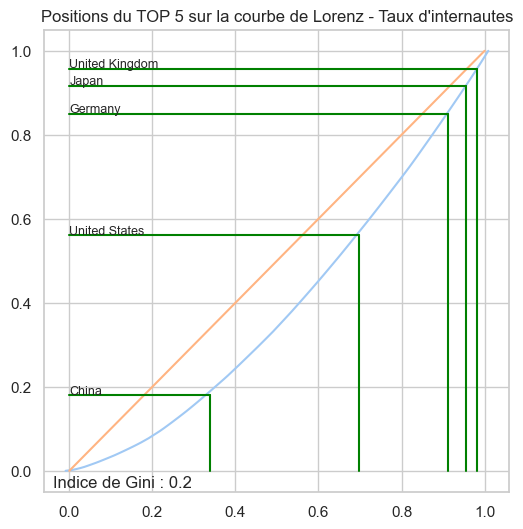

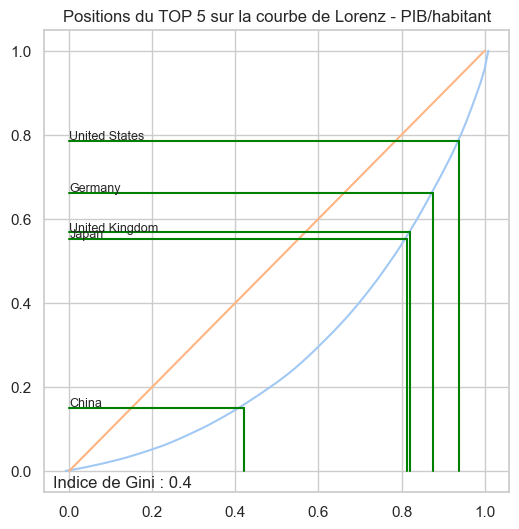

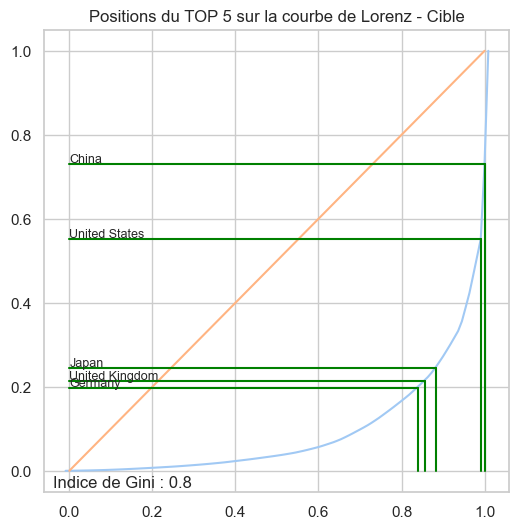

In [87]:
# Je liste les variables à traiter
score = ["Taux d'internautes", 'PIB/habitant', 'Cible']
# J'établis la liste des pays du TOP5 au classement global
top5 = edStatsData.loc[edStatsData['Type'] == 'Pays'].sort_values('SCORE_SYNT', ascending=True)['Pays'].iloc[:5].tolist()
# Pour chaque variable, je construis un graphique
for sc in score:
    # Je cherche la position dans le classement de chaque pays du TOP5
    classement = edStatsData.loc[edStatsData['Type'] == 'Pays'].sort_values(sc, ascending=False)['Pays'].tolist()
    position_top5=[]
    for top in top5:
        position_top5.append(classement.index(top))
        
    #Je construis la courbe de Lorenz de la variable    
    si = edStatsData.loc[edStatsData['Type'] == 'Pays'][sc].values
    n = len(si)
    lorenz = np.cumsum(np.sort(si)) / si.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
    plt.figure(figsize=(6,6))
    sns.lineplot(y=lorenz, x=xaxis)
    plt.plot([0,1], [0,1])
    
    # Les classements des pays étant ordonnés, je peux placer 2 lignes et le nom pour chaque pays du TOP5
    for pt5 in position_top5:
        plt.plot([1-(pt5-1)/n,1-(pt5-1)/n], [0,lorenz[n-pt5]], color='green')
        plt.plot([0,1-(pt5-1)/n], [lorenz[n-pt5],lorenz[n-pt5]], color='green')
        plt.text(0, lorenz[n-pt5]+0.003, classement[pt5], fontsize=9)
        
    # Calcul de l'indice de Gini
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = round(2*S, 1)
    plt.text(-0.04, -0.04, 'Indice de Gini : '+str(gini))
    
    plt.title('Positions du TOP 5 sur la courbe de Lorenz - '+sc)
    plt.show()

Tableau du TOP5

In [88]:
edStatsData.loc[edStatsData['Pays'].isin(top5)].sort_values('SCORE_SYNT', ascending=True)[["Pays", "Taux d'internautes", "PIB/habitant", "Cible"]]

Indicateur,Pays,Taux d'internautes,PIB/habitant,Cible
227,United States,76.176737,53341.815958,34957269.0
37,China,53.200000,14399.447660,145088724.0
107,Japan,92.000000,38252.301138,9651073.0
51,Germany,89.647101,44260.359679,6783203.0
75,United Kingdom,94.775801,39229.848765,7078006.0


**Perspectives**

Il serait intéressant d'envisager l'évolution de ces classements à l'aulne de l'évolution démographique, toutes choses égales par ailleurs.
Je regarde alors l'influence du taux de croissance démographique appliqué sur la cible.

La construction du *SCORE_SYNT* fait qu'il est impacté directement et de façon inversement proportionnelle par ce taux d'où les perspectives marchés à 1, 2, 3 ou 5 ans.

In [89]:
# Calcul du SCORE_SYNT dans les années futures
annees_futures = [('Année_N+1', 1), ('Année_N+2', 2), ('Année_N+3', 3), ('Année_N+5', 5)]
for (na, af) in annees_futures:
    edStatsData[na] = edStatsData['SCORE_SYNT'] / (1 + edStatsData['Croissance démographique'] / 100)**af
    

edStatsData.sort_values('SCORE_SYNT', ascending=True)[['Pays', 'Croissance démographique', 'SCORE_SYNT', 'Année_N+1', 'Année_N+2', 'Année_N+3', 'Année_N+5']]

Indicateur,Pays,Croissance démographique,SCORE_SYNT,Année_N+1,Année_N+2,Année_N+3,Année_N+5
157,North America,0.747962,7.539405e+00,7.483432e+00,7.427874e+00,7.372729e+00,7.263664e+00
60,Europe & Central Asia,0.503675,1.092468e+01,1.086993e+01,1.081546e+01,1.076125e+01,1.065366e+01
58,East Asia & Pacific,0.683098,1.801541e+01,1.789318e+01,1.777178e+01,1.765121e+01,1.741250e+01
227,United States,0.692801,3.951877e+01,3.924687e+01,3.897684e+01,3.870866e+01,3.817784e+01
122,Latin America & Caribbean,1.046807,6.288552e+01,6.223405e+01,6.158933e+01,6.095129e+01,5.969497e+01
...,...,...,...,...,...,...,...
137,Moldova,-0.059329,4.938612e+05,4.941544e+05,4.944478e+05,4.947413e+05,4.953289e+05
162,Nicaragua,1.110103,5.498202e+05,5.437837e+05,5.378134e+05,5.319086e+05,5.202930e+05
206,Swaziland,1.809667,8.391844e+05,8.242679e+05,8.096165e+05,7.952256e+05,7.672065e+05
175,Papua New Guinea,2.064027,1.518770e+06,1.488056e+06,1.457963e+06,1.428479e+06,1.371287e+06


In [90]:
# Evolution du classement des continents
df_pespectives_continent = edStatsData.loc[edStatsData['Type'] == 'Continent'].sort_values('SCORE_SYNT', ascending=True)[['Pays']]
df_pespectives_continent = df_pespectives_continent.rename(columns={'Pays': 'Année_N'})
df_pespectives_continent = df_pespectives_continent.reset_index()

for (na, af) in annees_futures:
        df_pespectives_continent[na] = edStatsData.loc[edStatsData['Type'] == 'Continent'].sort_values(na, ascending=True, ignore_index=True)[['Pays']]

df_pespectives_continent

Indicateur,index,Année_N,Année_N+1,Année_N+2,Année_N+3,Année_N+5
0,157,North America,North America,North America,North America,North America
1,60,Europe & Central Asia,Europe & Central Asia,Europe & Central Asia,Europe & Central Asia,Europe & Central Asia
2,58,East Asia & Pacific,East Asia & Pacific,East Asia & Pacific,East Asia & Pacific,East Asia & Pacific
3,122,Latin America & Caribbean,Latin America & Caribbean,Latin America & Caribbean,Latin America & Caribbean,Latin America & Caribbean
4,140,Middle East & North Africa,Middle East & North Africa,Middle East & North Africa,Middle East & North Africa,Middle East & North Africa
5,187,South Asia,South Asia,South Asia,South Asia,South Asia
6,200,Sub-Saharan Africa,Sub-Saharan Africa,Sub-Saharan Africa,Sub-Saharan Africa,Sub-Saharan Africa


In [91]:
# Evolution du classement des pays
df_pespectives_pays = edStatsData.loc[edStatsData['Type'] == 'Pays'].sort_values('SCORE_SYNT', ascending=True)[['Pays']].iloc[:15]
df_pespectives_pays = df_pespectives_pays.rename(columns={'Pays': 'Année_N'})
df_pespectives_pays = df_pespectives_pays.reset_index()

for (na, af) in annees_futures:
        df_pespectives_pays[na] = edStatsData.loc[edStatsData['Type'] == 'Pays'].sort_values(na, ascending=True, ignore_index=True)[['Pays']].iloc[:15]

df_pespectives_pays

Indicateur,index,Année_N,Année_N+1,Année_N+2,Année_N+3,Année_N+5
0,227,United States,United States,United States,United States,United States
1,37,China,China,China,China,China
2,107,Japan,Japan,Japan,Japan,Japan
3,51,Germany,Germany,Germany,Germany,Germany
4,75,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
5,71,France,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
6,188,Saudi Arabia,France,France,France,France
7,114,"Korea, Rep.","Korea, Rep.","Korea, Rep.",Canada,Canada
8,33,Canada,Canada,Canada,"Korea, Rep.","Korea, Rep."
9,185,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation


**Conclusion sur les perspectives d'évolution**

Il n'y a aucune évolution parmi les continents, dans les 5 années à venir.

Au niveau des pays, de petites évolutions sont à relever :
- dès l'année N+1, la France se fait doubler par l'Arabie Saoudite, tandis que le Quatar entre dans ce Top 15 au détriment des Pays-Bas
- plus tard, en année N+3, le Canada dépasse la Corée
- pour finir, en année N+5, le Quatar poursuit sa progression en dépassant les Emirats Arabes Unis.

**Aujourd'hui, le choix de se développer parmi les 5 premiers pays - Etats-Unis, Chine, Japon, Allemagne et Royaume-Uni - resterait toujours judicieux, 5 ans après.**